# Constructing simple models of biochemical networks with BondGraphTools

Tutorial copied from the Python tutorial for BondGraphTools, which can all be found here: https://github.com/mic-pan/BGT_BiochemicalNetworkTutorials

In [1]:
# Since BondGraphs is not yet in the package manager, we will need to include it locally from the dev folder
push!(LOAD_PATH, "C:/Users/jedfo/.julia/dev/BondGraphs/src/")
using BondGraphs

In [3]:
using Plots
using ModelingToolkit
using Catalyst

## A simple biochemical example
$A + B <=> C$<br>
BondGraphs can convert Catalyst reaction networks into a BondGraph

In [22]:
abc = @reaction_network ABC begin
    1, A + B --> C
end

Model ABC with 1 equations
States (3):
  A(t)
  B(t)
  C(t)
Parameters (0):

In [23]:
bg_abc = BondGraph(abc)

BondGraph BG:ABC (5 Nodes, 4 Bonds)

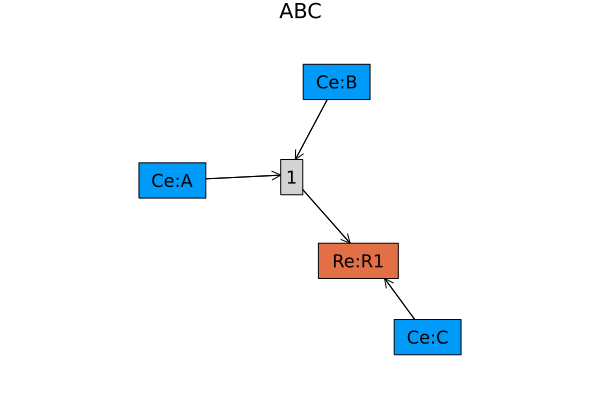

In [24]:
plot(bg_abc, fontsize=12)

In [25]:
constitutive_relations(bg_abc)

3-element Vector{Equation}:
 Differential(t)(A₊q(t)) ~ -R1₊r*(exp((A₊R*A₊T*log(A₊K*A₊q(t)) + B₊R*B₊T*log(B₊K*B₊q(t))) / (R1₊R*R1₊T)) - exp((C₊R*C₊T*log(C₊K*C₊q(t))) / (R1₊R*R1₊T)))
 Differential(t)(B₊q(t)) ~ -R1₊r*(exp((A₊R*A₊T*log(A₊K*A₊q(t)) + B₊R*B₊T*log(B₊K*B₊q(t))) / (R1₊R*R1₊T)) - exp((C₊R*C₊T*log(C₊K*C₊q(t))) / (R1₊R*R1₊T)))
 Differential(t)(C₊q(t)) ~ R1₊r*(exp((A₊R*A₊T*log(A₊K*A₊q(t)) + B₊R*B₊T*log(B₊K*B₊q(t))) / (R1₊R*R1₊T)) - exp((C₊R*C₊T*log(C₊K*C₊q(t))) / (R1₊R*R1₊T)))

In [26]:
sys = ODESystem(bg_abc)
display("text/plain", sys)

Model ABC with 3 equations
States (3):
  A₊q(t) [defaults to 0.0]
  B₊q(t) [defaults to 0.0]
  C₊q(t) [defaults to 0.0]
Parameters (12):
  R1₊T [defaults to 310.0]
  R1₊R [defaults to 8.314]
  R1₊r [defaults to 1.0]
  A₊T [defaults to 310.0]
  A₊R [defaults to 8.314]
  A₊K [defaults to 1.0]
⋮
Incidence matrix:
 ×  ⋅  ⋅  ×  ×  ×
 ⋅  ×  ⋅  ×  ×  ×
 ⋅  ⋅  ×  ×  ×  ×

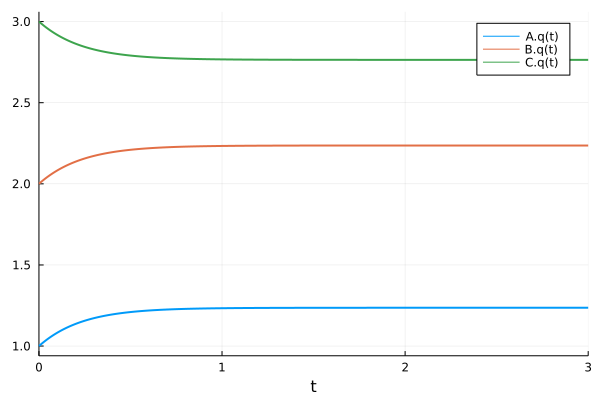

In [27]:
tspan = (0., 3.)
u0 = [1, 2, 3]
sol = simulate(bg_abc, tspan; u0)
plot(sol, lw=2)

## The reversible Michaelis-Menten model
E + S <=> C<br>
C <=> E + P

In [30]:
rn_mm = @reaction_network MM_reversible begin
    (1, 1), E + S <--> C
    (1, 1), C <--> E + P
end

Model MM_reversible with 4 equations
States (4):
  E(t)
  S(t)
  C(t)
  P(t)
Parameters (0):

Chemostats are chemical species that are held constant throught the reaction (`Se` in bond graph terms)

In [40]:
bg_mm = BondGraph(rn_mm; chemostats=["S"]) # should also incude "P"

BondGraph BG:MM_reversible (10 Nodes, 10 Bonds)

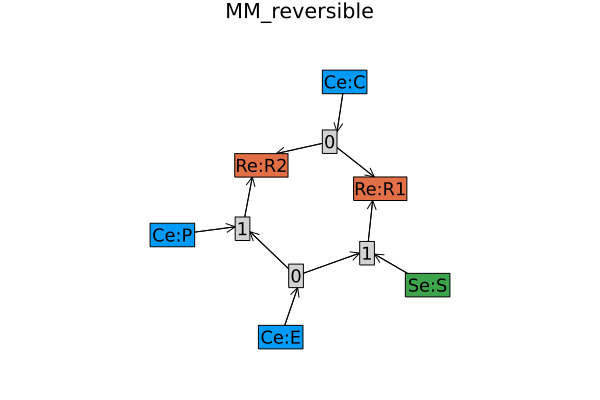

In [41]:
plot(bg_mm, fontsize=12)

In [44]:
controls(bg_mm)

1-element Vector{Num}:
 es(t)

TODO: fix bug relating to multiple es(t) functions

In [46]:
constitutive_relations(bg_mm)

9-element Vector{Equation}:
 Differential(t)(E₊q(t)) ~ -C₊p1₊F(t)
 Differential(t)(C₊q(t)) ~ C₊p1₊F(t)
 Differential(t)(P₊q(t)) ~ R2₊r*(exp(R2₊p1₊E(t) / (R2₊R*R2₊T)) - exp((P₊p1₊E(t) + R2₊p1₊E(t)) / (R2₊R*R2₊T))) - S₊p1₊F(t) - R1₊r*(exp((P₊p1₊E(t) + R2₊p1₊E(t)) / (R1₊R*R1₊T)) - exp(R2₊p1₊E(t) / (R1₊R*R1₊T)))
 0 ~ E₊R*E₊T*log(E₊K*E₊q(t)) - R2₊p1₊E(t)
 0 ~ 1.0 - P₊p1₊E(t)
 Differential(t)(R2₊p1₊E(t)) ~ -E₊R*E₊T*(E₊q(t)^-1)*C₊p1₊F(t)
 Differential(t)(R2₊p1₊E(t)) ~ C₊R*C₊T*(C₊q(t)^-1)*C₊p1₊F(t)
 Differential(t)(P₊p1₊E(t)) ~ -0.0
 Differential(t)(P₊p1₊E(t)) ~ (P₊R*P₊T*(R1₊r*exp(R2₊p1₊E(t) / (R1₊R*R1₊T)) + R2₊r*exp(R2₊p1₊E(t) / (R2₊R*R2₊T)) - S₊p1₊F(t) - R1₊r*exp((P₊p1₊E(t) + R2₊p1₊E(t)) / (R1₊R*R1₊T)) - R2₊r*exp((P₊p1₊E(t) + R2₊p1₊E(t)) / (R2₊R*R2₊T)))) / P₊q(t)

In [48]:
sys = ODESystem(bg_mm)
display("text/plain", sys)

Model MM_reversible with 9 equations
States (7):
  E₊q(t) [defaults to 0.0]
  C₊q(t) [defaults to 0.0]
  P₊q(t) [defaults to 0.0]
  R2₊p1₊E(t)
  P₊p1₊E(t)
  C₊p1₊F(t)
⋮
Parameters (16):
  R1₊T [defaults to 310.0]
  R1₊R [defaults to 8.314]
  R1₊r [defaults to 1.0]
  E₊T [defaults to 310.0]
  E₊R [defaults to 8.314]
  E₊K [defaults to 1.0]
⋮
Incidence matrix:
 ×  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ×  ⋅
 ⋅  ×  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ×  ⋅
 ⋅  ⋅  ×  ⋅  ⋅  ⋅  ⋅  ⋅  ×  ×  ⋅  ×
 ⋅  ⋅  ⋅  ⋅  ⋅  ×  ⋅  ⋅  ×  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ×  ⋅  ⋅
 ⋅  ⋅  ⋅  ×  ⋅  ×  ⋅  ⋅  ⋅  ⋅  ×  ⋅
 ⋅  ⋅  ⋅  ×  ⋅  ⋅  ×  ⋅  ⋅  ⋅  ×  ⋅
 ⋅  ⋅  ⋅  ⋅  ×  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 ⋅  ⋅  ⋅  ⋅  ×  ⋅  ⋅  ×  ×  ×  ⋅  ×

In [53]:
# tspan = (0., 3.)
# u0 = [1,2,1]
# sol = simulate(bg_mm, tspan; u0)
# plot(sol)